<a href="https://colab.research.google.com/github/TvLeeuwen/BoneJImageProcessing/blob/main/BoneJ_image_processing_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse bone morphological parameters using condacolab and PyImageJ



## Installing dependencies
The first step is to install [condacolab](https://github.com/conda-incubator/condacolab) in your notebook. Once this is complete, you can use conda to install the other dependencies into the environment. Note, this might take a few minutes to complete.

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


### Check if collab is functional

In [1]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


### Install PyImageJ using Mamba
This is all described under dynamic install using Google Collab at https://py.imagej.net/en/latest/Install.html

Note: this step throws a lot of output, which you can clear in the top left of the output cell after installation.

In [ ]:
!mamba install pyimagej openjdk=11

### Download and install Fiji
(Optional) Install plugins by using the commented code. Note that Filter_Rank is just a placeholder plugin here

In [ ]:
!wget https://downloads.imagej.net/fiji/latest/fiji-win64.zip > /dev/null && unzip fiji-win64.zip > /dev/null
!rm fiji-win64.zip
#!wget https://imagej.nih.gov/ij/plugins/download/Filter_Rank.class > /dev/null
#!mv Filter_Rank.class Fiji.app/plugins

## Set `JAVA_HOME`:

We need to do this so that the openjdk installed by mamba gets used, since a conda env is not actually active in this scenario.


In [4]:
import os
os.environ['JAVA_HOME']='/usr/local'

### Initiate ImageJ with the BoneJ plugin
Check version to see if it is working. This may take a while.

If you are interested in running Fiji/ImageJ fuctions programmatically in pyImageJ you find the code operations by running the GUI with a Python recorder macro. Open Fiji, go to _Plugins > Macros > Record..

In [6]:
import imagej
ij = imagej.init('sc.fiji:fiji:2.5.0+org.bonej:bonej-plugins:7.0.13')
print(ij.getVersion())

2.5.0/1.53r


### Installing Stackview

In [ ]:
!pip install pyclesperanto_prototype stackview ipycanvas==0.11

### Import Stackview + dependencies
This will also let you know if the installation was succesful

In [9]:
import stackview
import pyclesperanto_prototype as cle
from skimage.io import imread

In [17]:
cle.select_device("cupy")

'cupy backend (experimental)'

### Import data using PyImageJ
You can upload your data by going to the _Files_ tab on the toolbar on the left (not _File_ up top but _Files_ on the left)

In [37]:
#image_stack = imread('https://github.com/clEsperanto/clesperanto_example_data/raw/main/Lund_000500_resampled-cropped.tif?raw=true', plugin='tifffile')
#image_stack = ij.io().open('https://github.com/clEsperanto/clesperanto_example_data/raw/main/Lund_000500_resampled-cropped.tif?raw=true')
image_stack = ij.io().open('/content/GF_100_Tibiotarsus_Dist_U_cropped_and_purified.nrrd')
#image_stack = ij.io().open('/content/Lund_000500_resampled-cropped.tif')

# The upload returns the data in a numpy array, so use .shape to check if it worked
print(image_stack.shape)
print(image_stack.dims)

(583, 576, 1024)
('X', 'Y', 'Z')


## Visualisation

### PyImageJ
Use Fiji ij.io().open('') to read data

In [31]:
def plane(image, pos):
    """
    Slices an image plane at the given position.
    :param image: the image to slice
    :param pos: a dictionary from dimensional axis label to element index for that dimension
    """
    # Convert pos dictionary to position indices in dimension order.
    # See https://stackoverflow.com/q/39474396/1207769.
    p = tuple(pos[image.dims[d]] if image.dims[d] in pos else slice(None) for d in range(image.ndim))
    return image[p]

TypeError: ignored

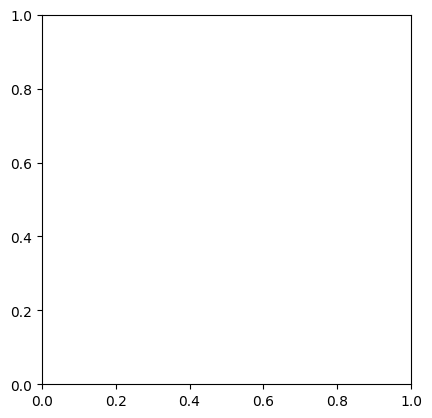

In [32]:
ij.py.show(plane(image_stack, {'Channel': 1, 'Time': 10}))

### Stackview
Use imread to load data

Figure out how to make it deal with fiji reader

In [ ]:
image_stack_on_gpu = cle.asarray(image_stack)

image_stack_on_gpu

Third-party Jupyter widgets

Support for third party widgets (widgets outside of the ipywidgets package) needs to be enabled separately. Support for these widgets will be loaded from a CDN external from Colab.


In [34]:
from google.colab import output
output.enable_custom_widget_manager()

In [35]:
stackview.slice(image_stack_on_gpu)